# Pokemon Data Visualization

In [18]:
import pandas as pd               # Import pandas package
import numpy as np                # Import numpy package
import matplotlib.pyplot as plt   # Import data visualation functions
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import Image


data = pd.read_csv("pokemon.csv") # Read data from the csv file
data.head(10)                     # The first 10 rows of the dataset

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


Some basic measures of each attributes are summarized as below.

In [3]:
data.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### Distribution of Pokemon by its primary type

In [4]:
colors = {
    "Water": "#6390F0",
    "Normal": "#A8A77A",
    "Grass": "#7AC74C",
    "Bug": "#A6B91A",
    "Psychic": "#F95587",
    "Fire": "#EE8130",
    "Rock": "#B6A136",
    "Electric": "#F7D02C",
    "Dragon": "#6F35FC",
    "Ground": "#E2BF65",
    "Ghost": "#735797",
    "Dark": "#705746",
    "Poison": "#A33EA1",
    "Fighting": "#C22E28",
    "Steel": "#B7B7CE",
    "Ice": "#96D9D6",
    "Fairy": "#D685AD",
    "Flying": "#A98FF3",
} 


In [11]:
type1data = data['Type 1']
count = type1data.value_counts()

barchart = go.Bar(x = count.index, 
                  y = count.values, 
                  text = count.values,
                  textposition = 'auto', 
                  marker = dict(color = list(colors.values())))

fig1 = go.Figure(barchart)

fig1.update_layout(title = 'Distribution of Pokemon by Type 1', 
                     xaxis_title = 'Type 1', 
                     yaxis_title = 'Number of Pokemon')

fig1.show()

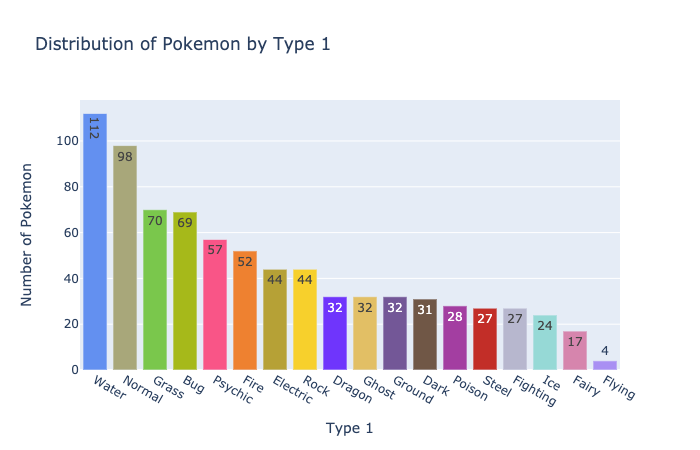

In [20]:
#Static Image
Image(filename = 'images/pokemon1.png')

### Distribution of Total strength of Pokemon across generations

In [13]:
fig2 = go.Figure()
generations = []

for i in range(1,7):
    generations.append(data.loc[data['Generation'] == i, 'Total'])
    fig2.add_trace(go.Box(y = generations[i-1], name = 'Generation' + str(i), boxpoints = "all"))


fig2.update_layout(title = 'Distribution of Pokemon\'s Strength Across Generations', 
                   xaxis_title = 'Generation', 
                   yaxis_title = 'Total Strength')

fig2.show()

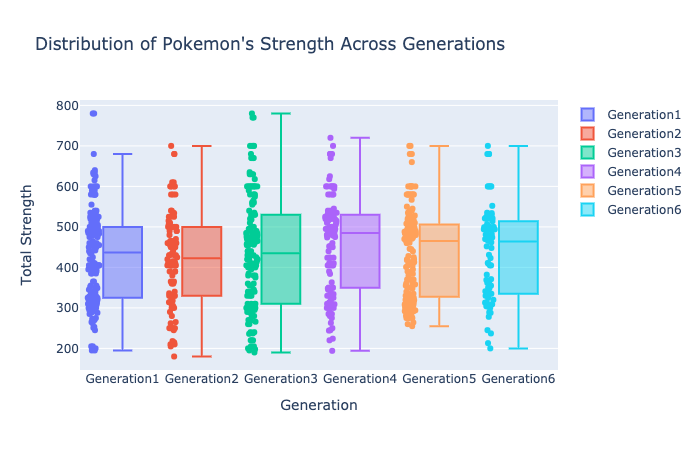

In [21]:
#Static Image
Image(filename = 'images/pokemon2.png')

### Radar chart that allows you to compare custom Pokemon by stats

In [14]:
attributes = ['HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed']

num = int(input("How many Pokemon do you want to compare? "))

pokemon_data = {}
for i in range(num):
    name = input("Please input the name of the Pokemon you wish to compare: ")
    name = name.capitalize()
    curr_data = data.loc[data['Name'] == name, 'HP':'Speed']
    while curr_data.count()[0] == 0:
        name = input("Invalid Pokemon. Please input the name of the Pokemon you wish to compare: ")
        curr_data = data.loc[data['Name'] == name, 'HP':'Speed']
    pokemon_data[name] = curr_data.values.tolist()

fig3 = go.Figure()

for pokemon in pokemon_data:
    fig3.add_trace(go.Scatterpolar(
        r = pokemon_data[pokemon][0],
        theta = attributes,
        fill = 'toself',
        name = pokemon))
    
fig3.update_layout(
    title = "Comparison of Pokemon by Stats",
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=True
)

fig3.show()

How many Pokemon do you want to compare? 3
Please input the name of the Pokemon you wish to compare: Squirtle
Please input the name of the Pokemon you wish to compare: Charmander
Please input the name of the Pokemon you wish to compare: Bulbasaur


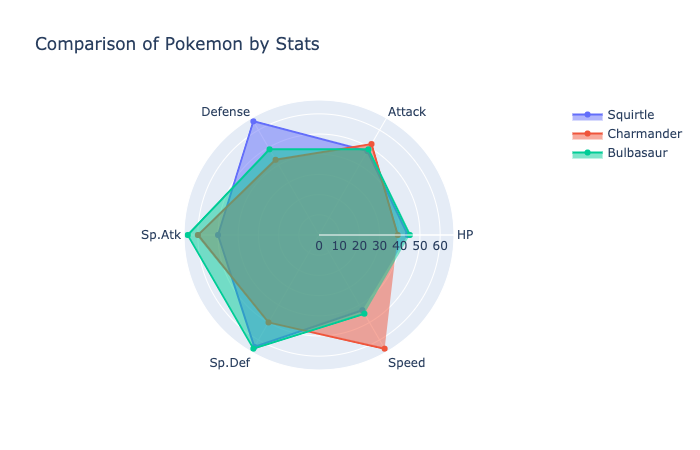

In [22]:
#Static Image
Image(filename = 'images/pokemon3.png')